In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('..')

In [2]:
from helpers.data_loading import load_data_from_dir
from WideBNetModel import morton

2024-04-19 14:26:01.376876: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Pysteps configuration file found at: /home/meliao/miniconda3/envs/jax_inv_scat/lib/python3.11/site-packages/pysteps/pystepsrc



# Load and visualize our data

In [3]:
DIR_OURDATA_FORMAT = "/net/projects/willettlab/meliao/recursive-linearization/dataset/test_measurements_nu_{}"

In [4]:
L = 4
s = 12
n_pixels = (2**L) * s
wavenumbers = ["2", "4", "8"]
n_freqs = len(wavenumbers)
truncate_num = 531
(scatter, eta, eta_mean, eta_std, scatter_means, scatter_stds) = (
    load_data_from_dir(
        DIR_OURDATA_FORMAT,
        True,
        L,
        s,
        wavenumbers=wavenumbers,
        truncate_num=truncate_num,
    )
)

idxes = morton.morton_to_flatten_indices(L, s)

Loading data from directory:  /net/projects/willettlab/meliao/recursive-linearization/dataset/test_measurements_nu_{}
_concat_all_files_in_dir_ours: file_list:  ['measurements_500.h5', 'measurements_0.h5']
_concat_all_files_in_dir_ours: file_list:  ['measurements_0.h5', 'measurements_500.h5']
_concat_all_files_in_dir_ours: file_list:  ['measurements_0.h5', 'measurements_500.h5']


In [5]:
print(scatter.shape)

(531, 2, 36864, 3)


## Plot a few etas

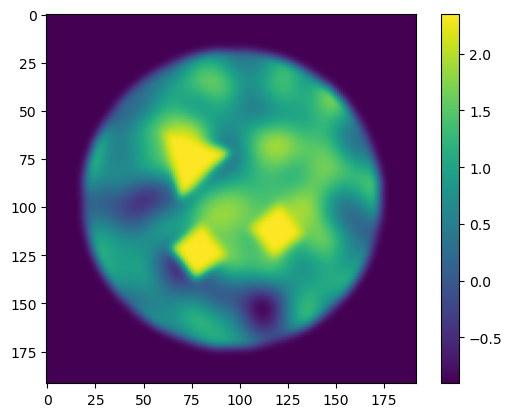

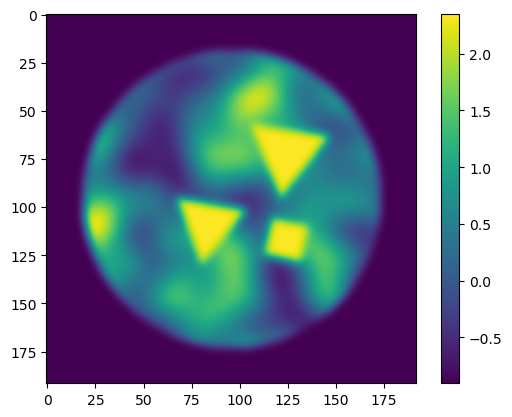

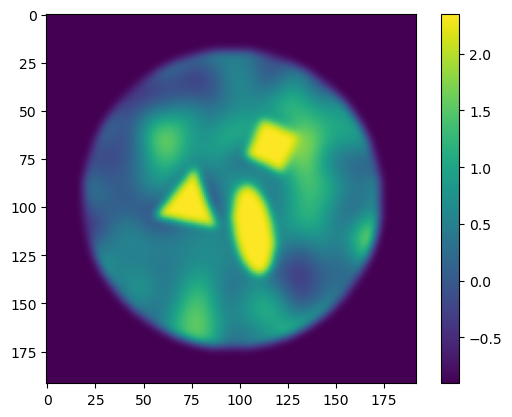

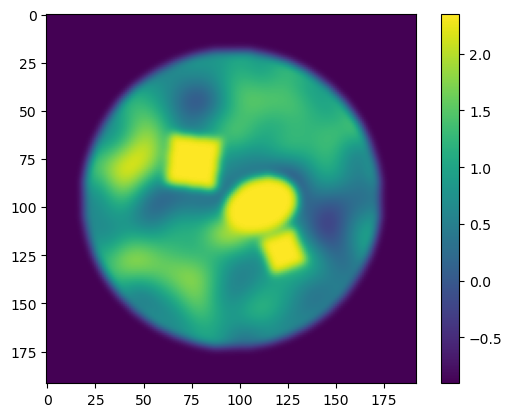

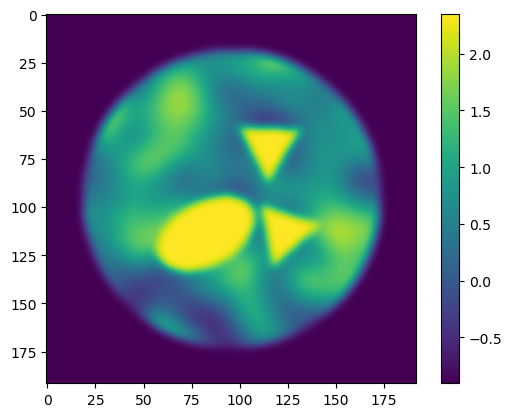

<Figure size 640x480 with 0 Axes>

In [6]:
for i in range(5):
    plt.imshow(eta[i])
    plt.colorbar()
    plt.show()
    plt.clf()

## Plot a few scats

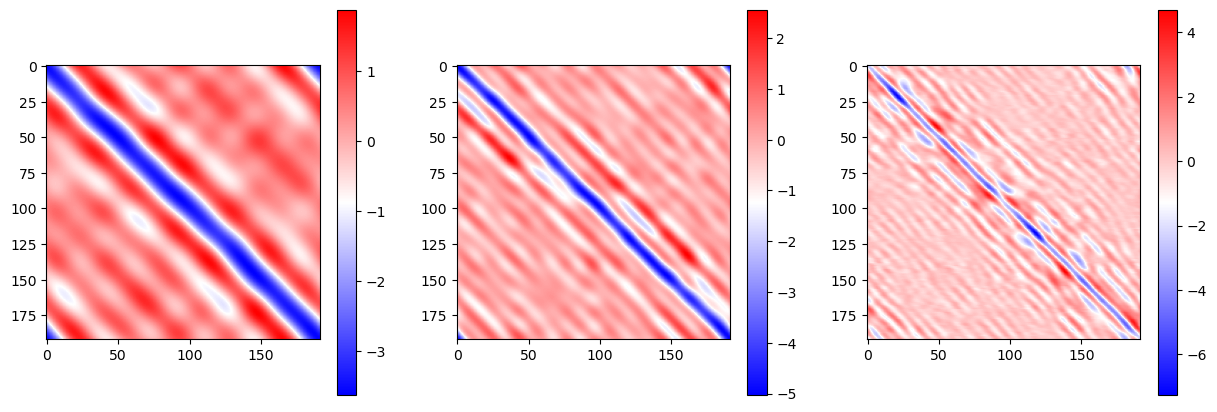

<Figure size 640x480 with 0 Axes>

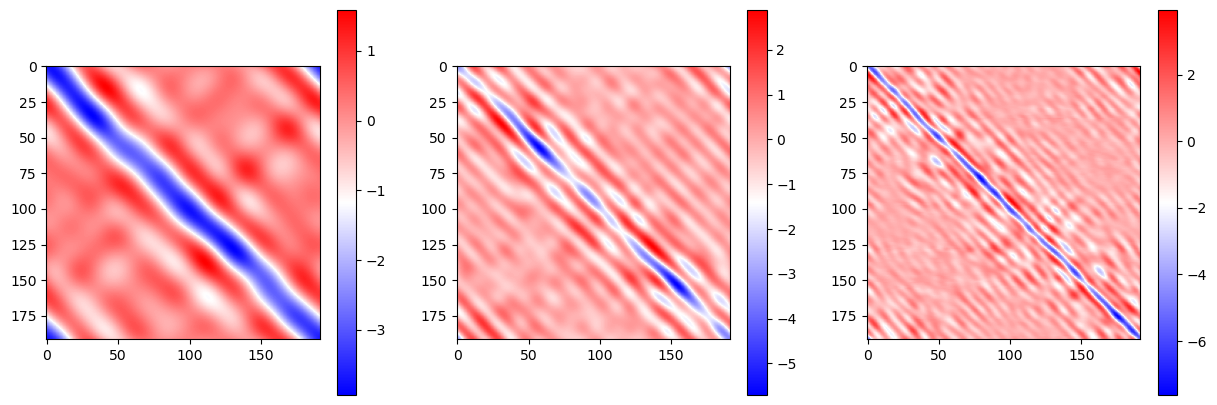

<Figure size 640x480 with 0 Axes>

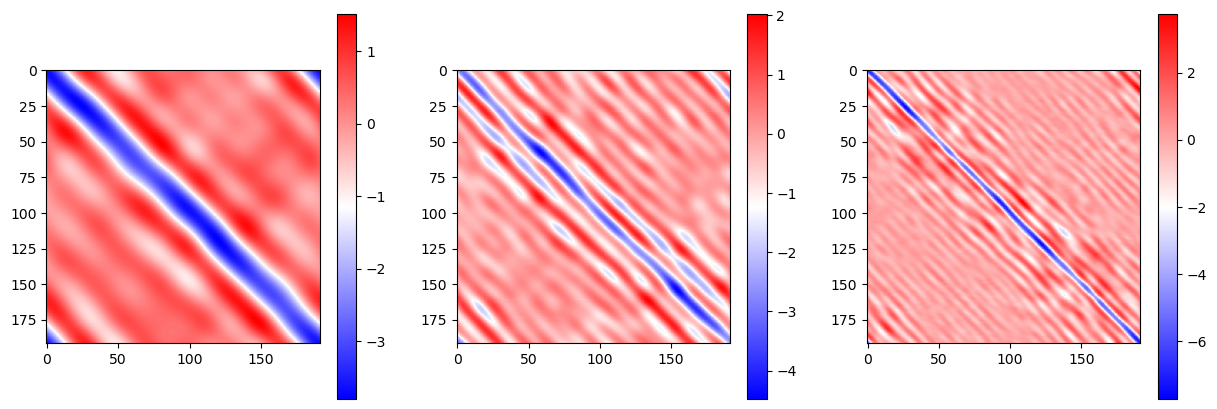

<Figure size 640x480 with 0 Axes>

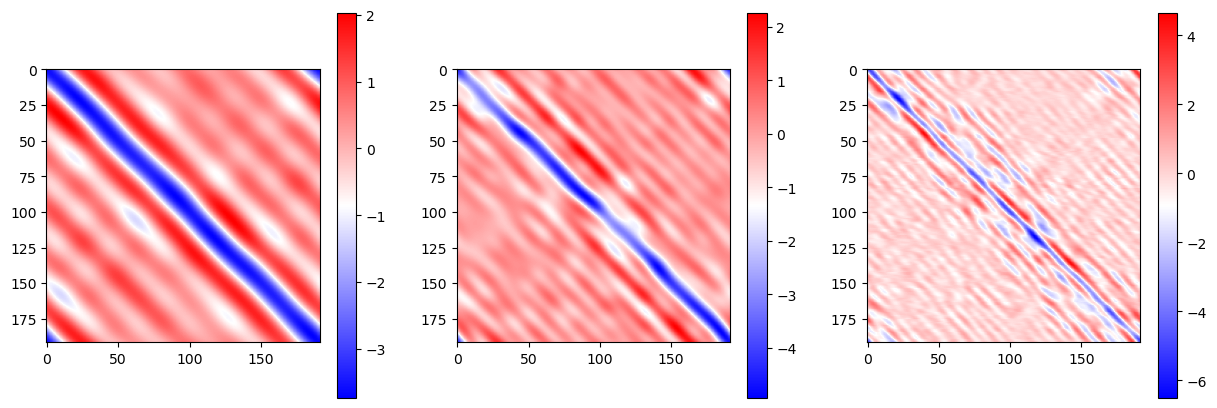

<Figure size 640x480 with 0 Axes>

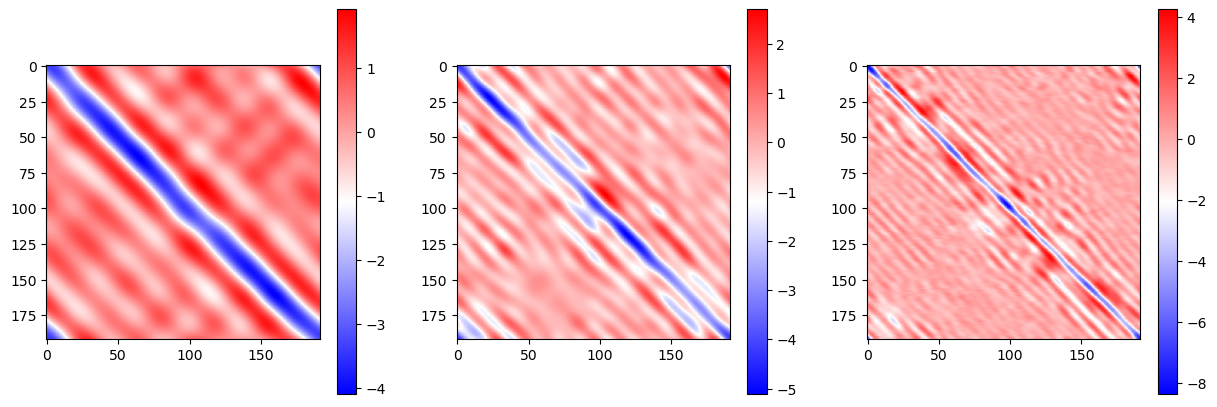

<Figure size 640x480 with 0 Axes>

In [8]:
for i in range(5):
    fig, ax = plt.subplots(1,3)
    fig.set_size_inches(15,5)
    for j in range(len(wavenumbers)):
        arr_j_flat = scatter[i, 0, :, j]
        arr_j_flat = arr_j_flat[idxes]
        im_j = ax[j].imshow(arr_j_flat.reshape(192,192), cmap='bwr')
        plt.colorbar(im_j, ax=ax[j])
    
    plt.show()
    plt.clf()

# Load and visualize Borong's data

In [9]:
DIR_TESTDATA = "/home/meliao/projects/Inverse_Scattering_ML_TF2/public-example/testdata"

In [10]:
L = 4
s = 5
n_pixels = (2**L) * s
wavenumbers = ["2.5", "5", "10"]
n_freqs = len(wavenumbers)
truncate_num = 531
(scatter, eta, eta_mean, eta_std, scatter_means, scatter_stds) = (
    load_data_from_dir(
        DIR_TESTDATA,
        True,
        L,
        s,
        wavenumbers=wavenumbers,
        truncate_num=truncate_num,
    )
)

idxes = morton.morton_to_flatten_indices(L, s)

Loading data from directory:  /home/meliao/projects/Inverse_Scattering_ML_TF2/public-example/testdata


In [11]:
print(scatter.shape)

(531, 2, 6400, 3)


## Plot a few etas

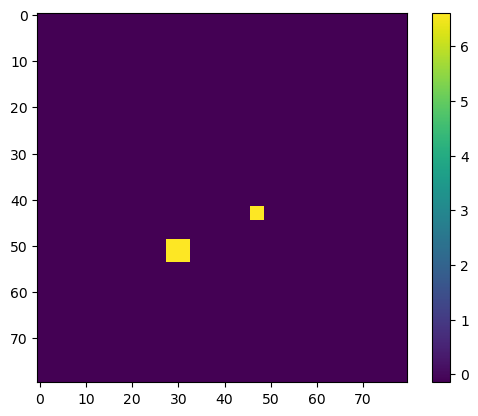

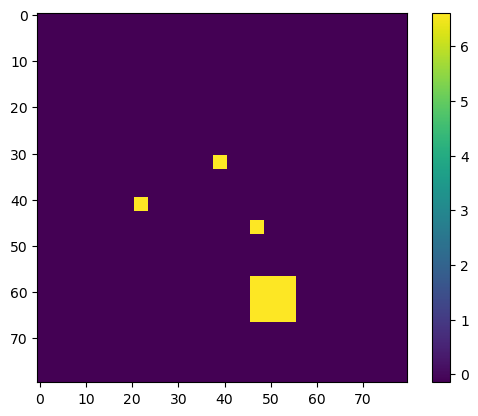

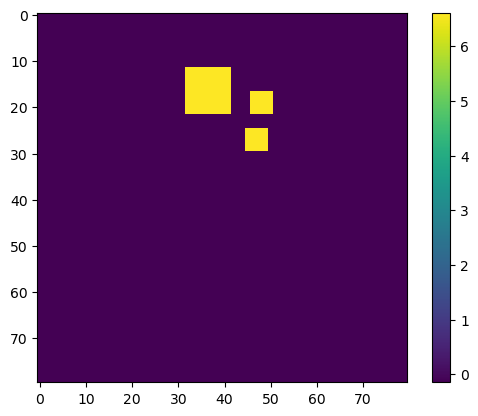

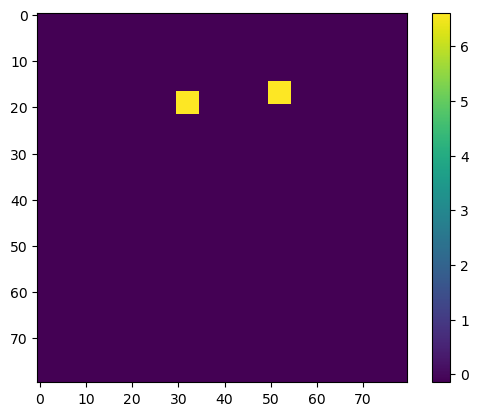

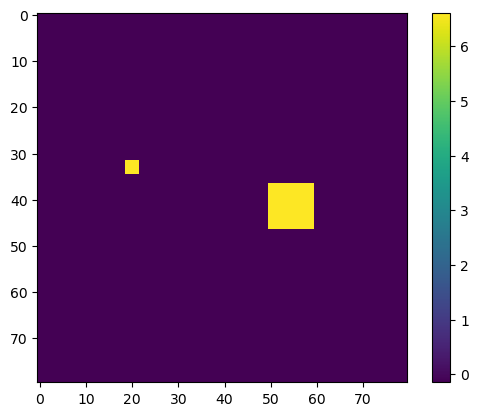

<Figure size 640x480 with 0 Axes>

In [12]:
for i in range(5):
    plt.imshow(eta[i])
    plt.colorbar()
    plt.show()
    plt.clf()

## Plot a few scats

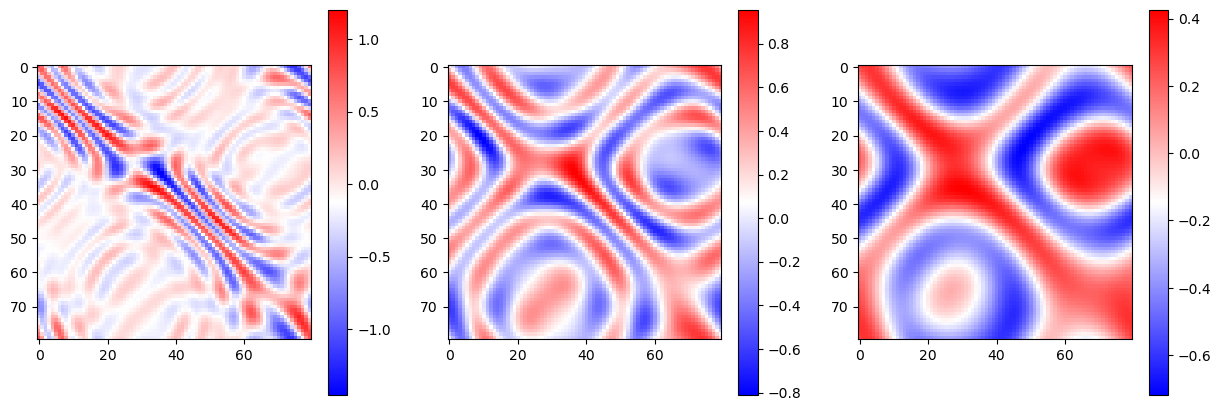

<Figure size 640x480 with 0 Axes>

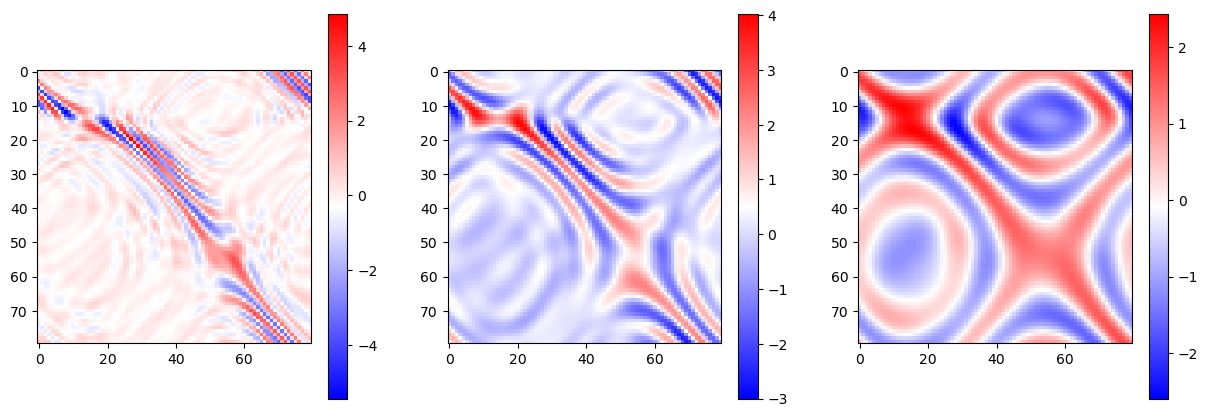

<Figure size 640x480 with 0 Axes>

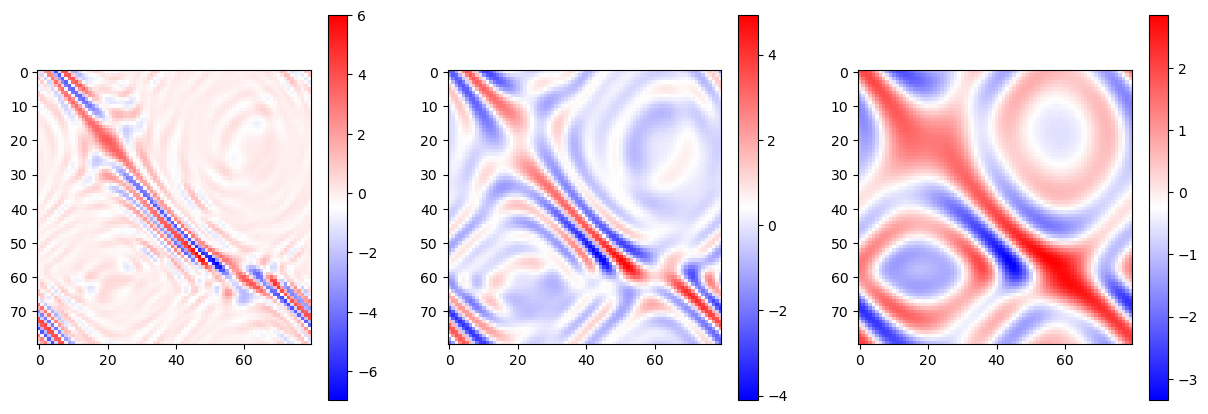

<Figure size 640x480 with 0 Axes>

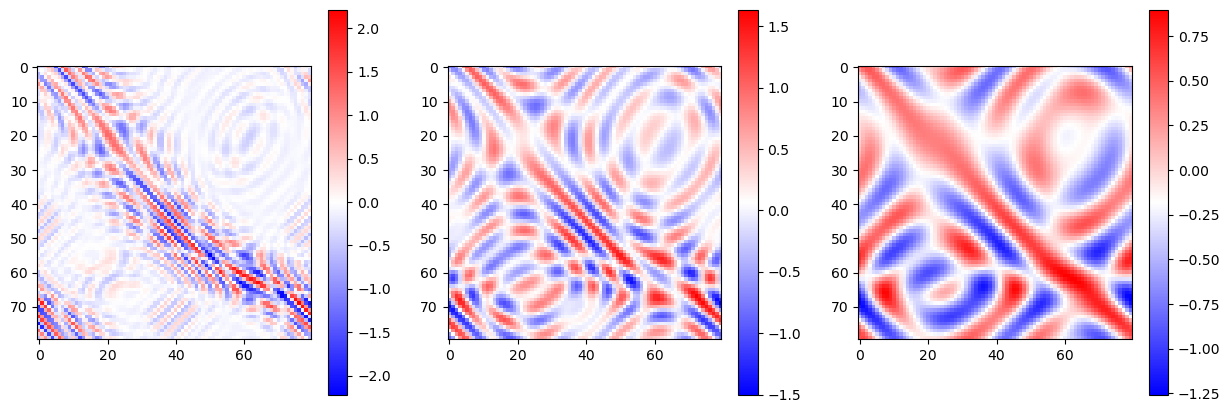

<Figure size 640x480 with 0 Axes>

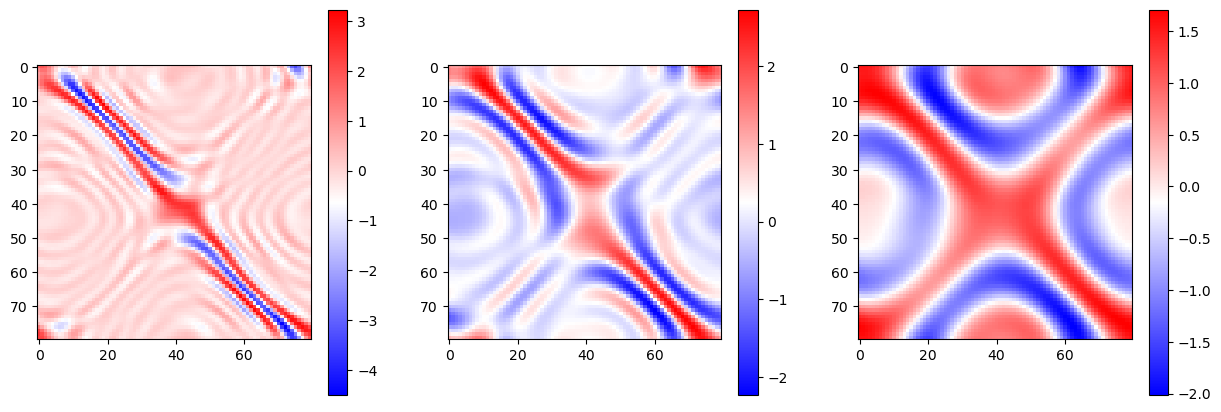

<Figure size 640x480 with 0 Axes>

In [13]:
for i in range(5):
    fig, ax = plt.subplots(1,3)
    fig.set_size_inches(15,5)
    for j in range(len(wavenumbers)):
        arr_j_flat = scatter[i, 0, :, j]
        arr_j_flat = arr_j_flat[idxes]
        im_j = ax[j].imshow(arr_j_flat.reshape(80,80), cmap='bwr')
        plt.colorbar(im_j, ax=ax[j])
    
    plt.show()
    plt.clf()